# Lead Scoring Case Study


## Problem Statement 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src='https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg' >

Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals of the Case Study
There are quite a few goals for this case study.
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing the necessary libraries 

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries and classes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics


#change display options 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Reading and understanding the data

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Shape of the dataset

In [3]:
df.shape

(9240, 37)

### Basic information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### A few columns have missing values, will explore in detail further down 

### Numerical stats of the dataset

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Check for duplicates on column Prospect ID

In [6]:
df.duplicated(subset='Prospect ID').sum()

0

#### There aren't any duplicates on Prospect ID

### Observation: Select option showing up in a lot of columns. 
This 'Select' is showing up because customer did not select any option from the list, and is actually a Null value.Converting 'Select' values to NaN.

In [7]:
df = df.replace('Select', np.nan)


### Check for missing values

In [8]:
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Removing columns with more than 40% missing values

In [9]:
leads_data = df[df.columns[(df.isnull().sum()/len(df))*100 <  40]]

print("Before removing columns:", df.shape)
print("After removing columns:", leads_data.shape)

Before removing columns: (9240, 37)
After removing columns: (9240, 30)


In [10]:
round(leads_data.isnull().sum() * 100/len(leads_data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Exploring all columns with more than 2% missing values

#### Country column

In [11]:
leads_data.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Bangladesh                 2
Netherlands                2
Uganda                     2
Belgium                    2
Ghana                      2
Italy                      2
Philippines                2
Asia/Pacific Region        2
China                      2
Switzerland                1
Kenya                      1
Liberia                    1
Vietnam                    1
Indonesia                  1
Russia        

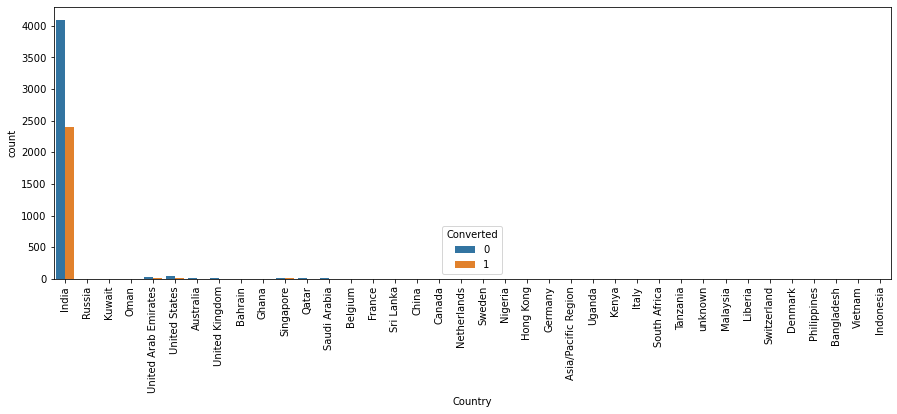

In [12]:
# visualizing the country column
plt.figure(figsize=[15,5])
sns.countplot(leads_data.Country, hue=leads_data.Converted)
plt.xticks(rotation=90)
plt.show()

#### INSIGHTS:
1. India has the maximum values, followed by NaN
2. This column can be dropped as it won't help in the Logistic regression model 


In [13]:
#dropping the Country column
leads_data.drop(['Country'], axis = 1, inplace = True)

In [14]:
leads_data.shape

(9240, 29)

#### Specialization column

In [15]:
leads_data.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#can't replace NaN with any other speicalizations as it might skew the data, adding new type
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,'Others')

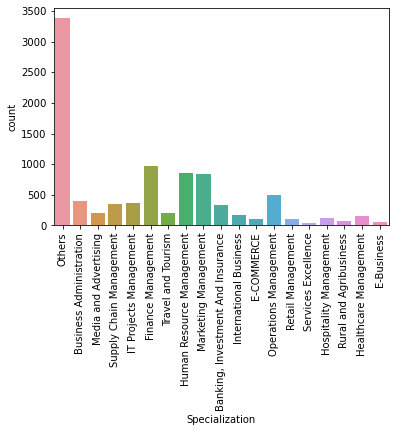

In [17]:
sns.countplot(leads_data.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [18]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#NaN can be replaced by Unemployed 
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [20]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course column 

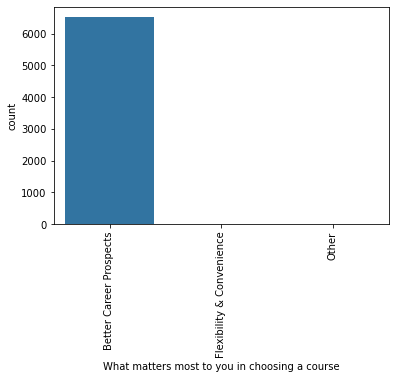

In [21]:
sns.countplot(leads_data['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [22]:
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
#NaN can be replaced with Better Career Prospects
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [24]:
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Tags column

In [25]:
leads_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [26]:
leads_data.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
#NaN can be replaced with Will revert after reading the email
leads_data.Tags = leads_data.Tags.replace(np.nan,'Will revert after reading the email')

In [28]:
leads_data.Tags.value_counts(dropna=False)

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

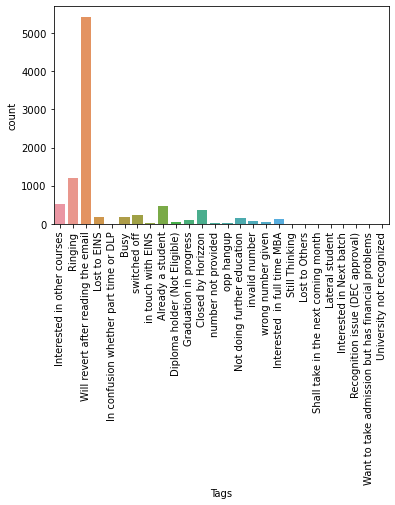

In [29]:
sns.countplot(leads_data.Tags)
plt.xticks(rotation = 90)
plt.show()

#### City Column

In [30]:
leads_data.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
#NaN can be replaced with Mumbai 
leads_data.City = leads_data.City.replace(np.nan,'Mumbai')

In [32]:
leads_data.City.value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

### Lets check for missing values again

In [33]:
round(leads_data.isnull().sum() * 100/len(leads_data),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [34]:
# Rest missing values are under 2% so we can drop these rows.
leads_data.dropna(inplace = True)

In [35]:
round(leads_data.isnull().sum() * 100/len(leads_data),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

## Exploratory Data Analysis

#### Converted column

In [36]:
# Data dictionary: Converted is the target variable, 
# Indicates whether a lead has been successfully converted (1) or not (0).
leads_data.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [37]:
con_rate =(sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
con_rate

37.85541106458012

#### Lead Origin Column

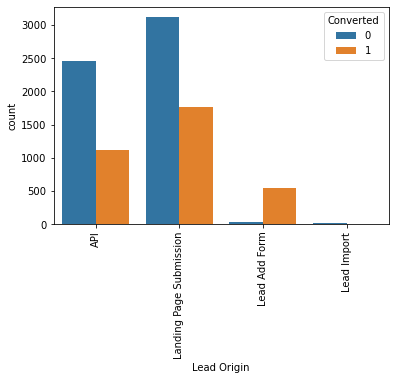

In [38]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. API and Landing Page Submission have 30-35% conversion rate 
2. Lead Add Form has more than 90% conversion rate but total leads from this are low in number.
3. Lead Import has very less in count.

To improve overall lead conversion rate, business needs to focus more on improving lead conversion through API and Landing Page Submission origin and generate more leads from Lead Add Form

#### Lead Source Column

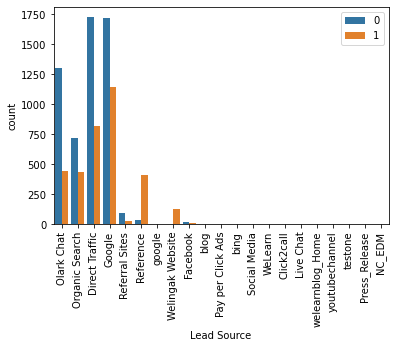

In [39]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.show()

#### Inference
1. Google, Direct traffic and Olark Chat generate maximum number of leads.
2. Conversion rate of Reference and Welingak website is high.

To improve overall lead conversion rate, business needs to focus on improving lead conversion through Olark chat, organic search, direct traffic, and google leads and simultaneously generate more leads from reference and welingak website.

#### Total Visits column

In [40]:
leads_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

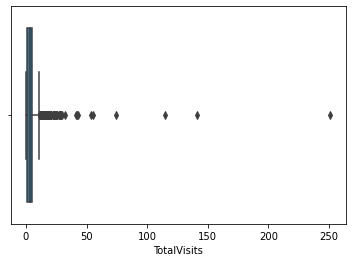

In [41]:
sns.boxplot(leads_data['TotalVisits'])
plt.show()

##### There are too many outliers in the data, need to exclude these from the analysis, so capping at 95th percentile

In [42]:
perc = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= perc[0]] = perc[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= perc[1]] = perc[1]

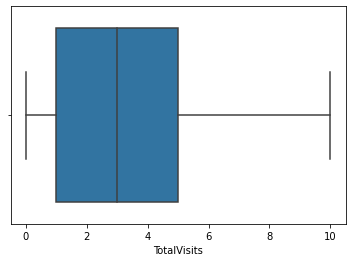

In [43]:
sns.boxplot(leads_data['TotalVisits'])
plt.show()

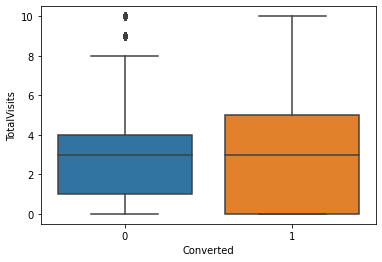

In [44]:
sns.boxplot(y= 'TotalVisits', x= 'Converted', data= leads_data)
plt.show()

#### Inference: Medican is the same for Yes and No for Converted

Nothing conclusive on this column

#### Total Time spent on the website column

In [45]:
leads_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

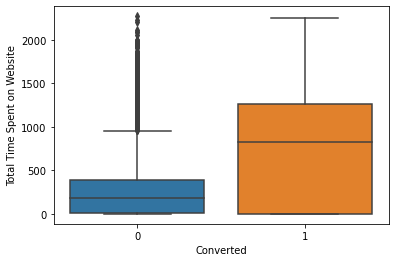

In [46]:
sns.boxplot(y= 'Total Time Spent on Website', x= 'Converted', data = leads_data)
plt.show()

#### Inference: Median is siginificantly higher for converted leads

#### Page views per visit column

In [47]:
leads_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

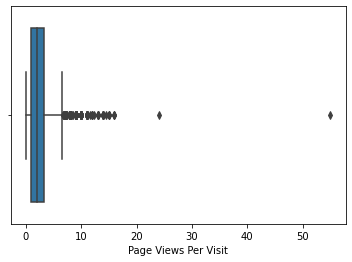

In [48]:
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

In [49]:
#Too many outliers, need to cap at 95th percentile
perc = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= perc[0]] = perc[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= perc[1]] = perc[1]

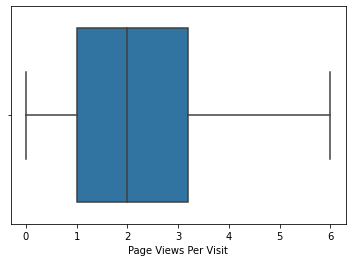

In [50]:
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

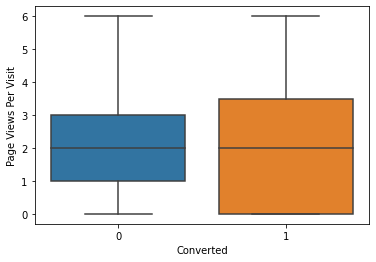

In [51]:
sns.boxplot(y='Page Views Per Visit', x= 'Converted', data= leads_data)
plt.show()

#### Inference: Median values are the same, nothing conclusive

#### Last Acitivty column

In [52]:
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

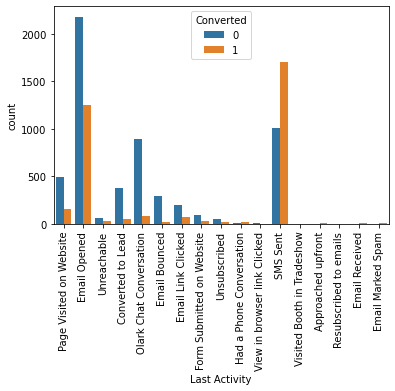

In [53]:
sns.countplot(x= "Last Activity", hue= "Converted", data= leads_data)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Most of the lead have Email Opened as last activity.
2. Conversion rate for leads with last activity as SMS Sent is the highest at 60%

#### Iterating through all other columns

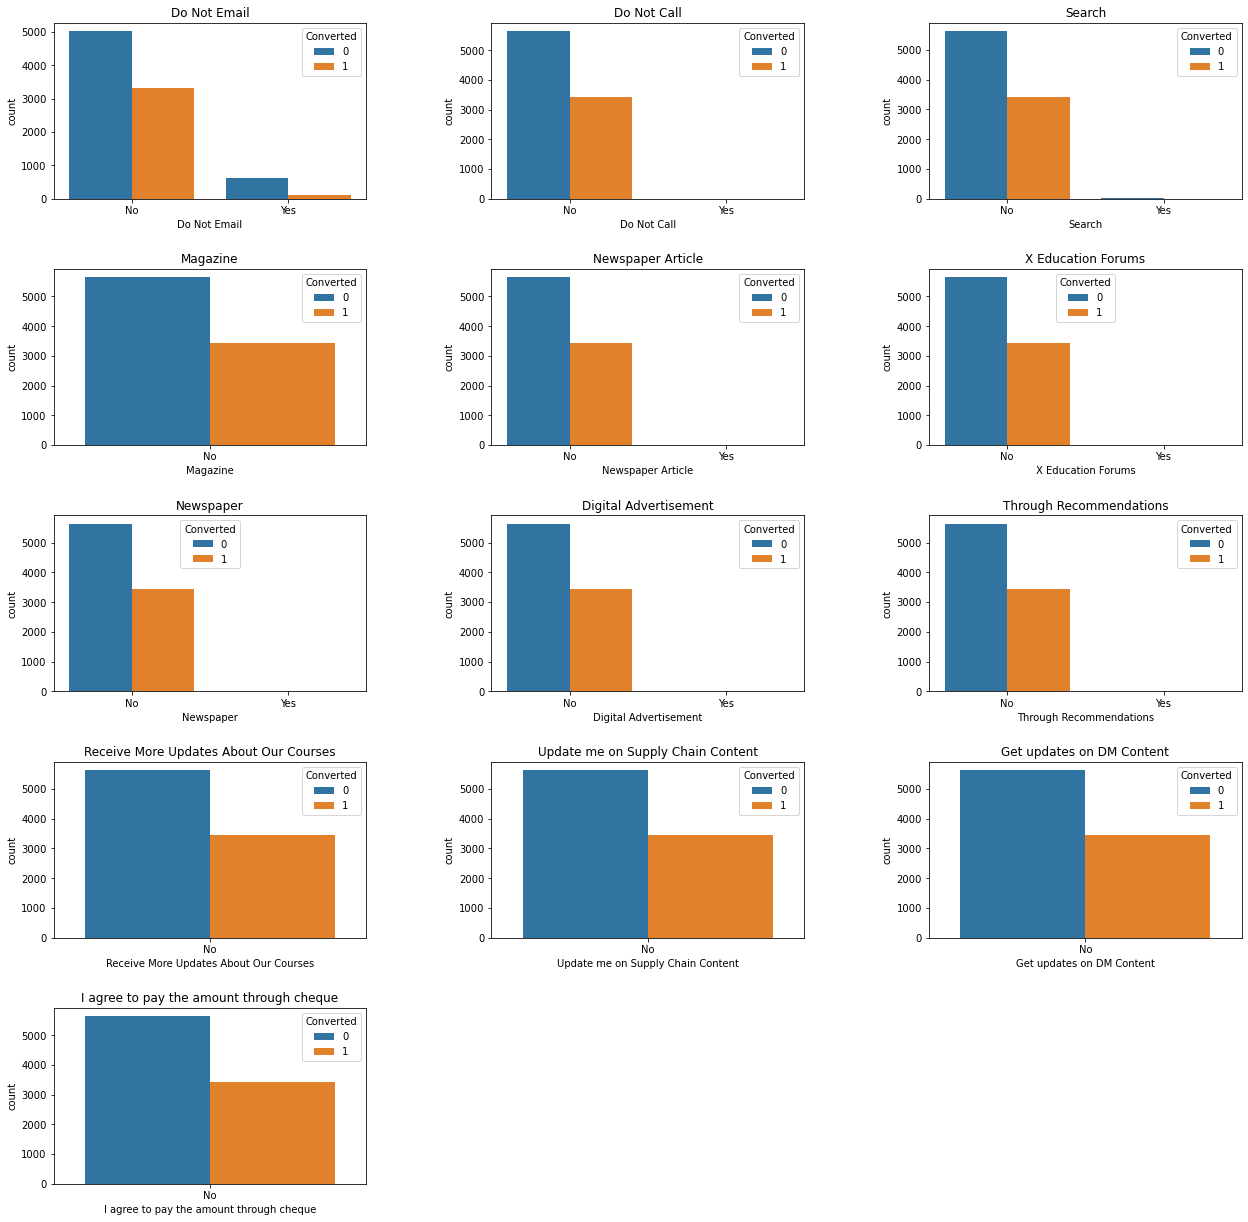

In [54]:
cols = ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement',
        'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
        'Get updates on DM Content','I agree to pay the amount through cheque']

#  Categorical Data
no_of_rows = 5
no_of_columns = 3
plot_count = 1

fig = plt.figure(figsize=(15,15))

for i in cols:
    plt.subplot(no_of_rows, no_of_columns, plot_count)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(leads_data[i],   hue=leads_data.Converted)
    plot_count = plot_count + 1
plt.subplots_adjust(left=0.1, right=1.2,top=1.2, wspace=0.4, hspace=0.4)
plt.show()

In [55]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Observations:

> **All Unique items**
1. Prospect ID.
2. Lead Number.
- These two columns have unique values which won't be useful so we can drop these columns

> **More values of No**

3. Do Not Email 
4. Do Not Call
5. Search
6. Magazine
7. Newspaper Article
8. X Education Forums
9. Newspaper
10. Digital Advertisement
11. Through Recommendations 
12. Receive More Updates About Our Courses
13. Update me on Supply Chain Content
14. Get updates on DM Content
15. I agree to pay the amount through cheque
- Have to drop all these columns due to imbalance 

In [56]:
# all columns needed to be dropped
dropping_col = ['Prospect ID','Lead Number', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine',
               'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
               'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque', 'What matters most to you in choosing a course']


In [57]:
#dropping columns
leads_data = leads_data.drop(columns=dropping_col)

In [58]:
leads_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [59]:
leads_data.shape

(9074, 13)

## Data Preparation 

In [60]:
#extracting category columns and numerical columns

#categorical column
category_col = [col for col in leads_data.columns if leads_data[col].dtype == 'O']
category_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [61]:
#numerical column
numerical_col = [col for col in leads_data.columns if leads_data[col].dtype != 'O']
numerical_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [62]:
# Creating dummy variables
dummy_variables = pd.get_dummies(leads_data[category_col], drop_first=True)
dummy_variables

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [63]:
# merging the dummy variable Data Frame with the leads_data Data Frame
leads_data = pd.concat([leads_data, dummy_variables], axis=1)
leads_data

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,O

In [64]:
# Droping the variables for which we created dummy variables
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Tags',
                   'Specialization', 'What is your current occupation', 'City',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [65]:
leads_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

## Test-Train Split 

In [66]:
# Expect Target variable storing all the feature variables in X, Target column in Y
X = leads_data.drop(['Converted'], 1)
y = leads_data['Converted']

In [67]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [68]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
#checking the Target variable count
leads_data.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

### Split data into 70-30 train and test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=21)

In [71]:
# checking the shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6351, 111)
(6351,)
(2723, 111)
(2723,)


## Scaling the features

In [72]:
numerical_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [73]:
#removing the target variable from the numerical col
numerical_col.remove('Converted')
numerical_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [74]:
X_train[numerical_col]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7368,0.0,0,0.0
6058,2.0,251,2.0
2986,3.0,1286,3.0
8595,2.0,252,2.0
339,3.0,199,1.5
...,...,...,...
6985,0.0,0,0.0
48,6.0,1225,6.0
9129,9.0,82,6.0
6066,1.0,798,1.0


In [75]:
# Scaling the numeric features
scaler = MinMaxScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7368,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6058,0.2,0.110475,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2986,0.3,0.566021,0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Checking for correlations

In [76]:
corr = leads_data.corr()

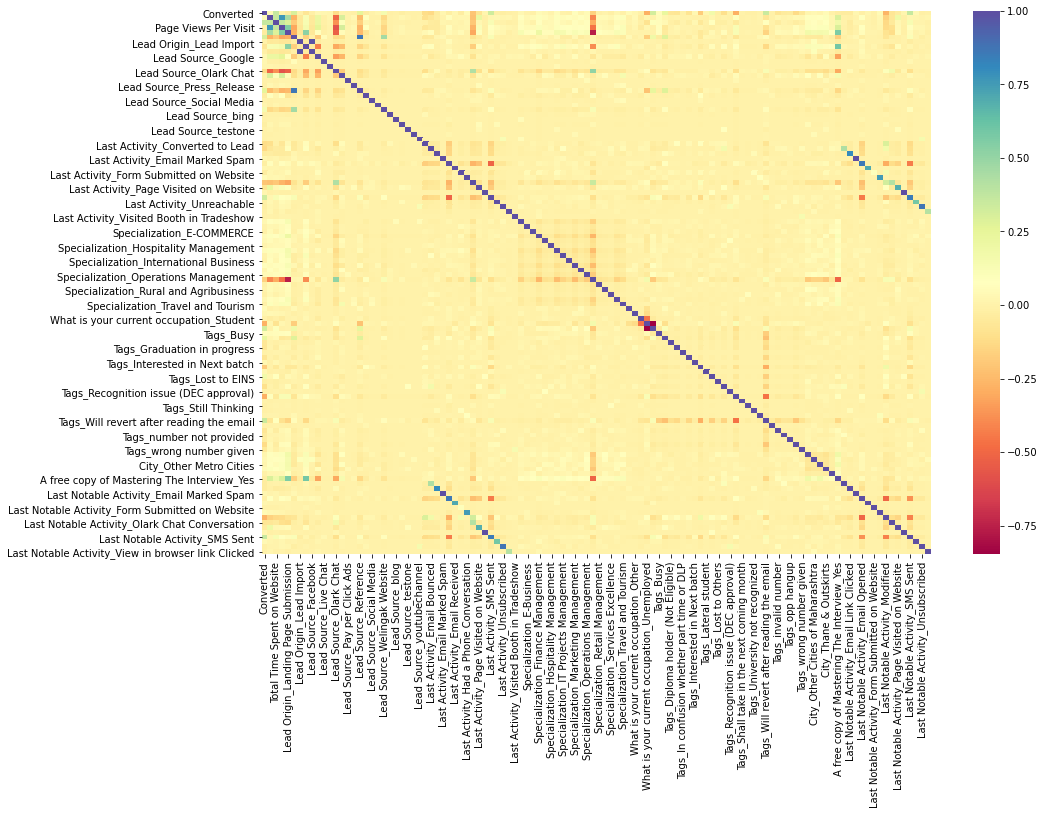

In [77]:
plt.figure(figsize= [15,10])
sns.heatmap(corr, cmap='Spectral')
plt.show()

- Most of the columns are correlating neutrally
- There are some columns more positively correlating than negative

## Model Building 

In [78]:
#building model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.9034797669658321
Testing Accuracy
0.5056922511935366
[[ 370 1294]
 [  52 1007]]
              precision    recall  f1-score   support

           0       0.88      0.22      0.35      1664
           1       0.44      0.95      0.60      1059

    accuracy                           0.51      2723
   macro avg       0.66      0.59      0.48      2723
weighted avg       0.71      0.51      0.45      2723



### Using RFE

In [79]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
# looking into the top 15 variables which are selected by RFE
list(zip(X_train.columns[rfe.support_], rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 38),
 ('Specialization_Others', False, 55),
 ('What is your current occupation_Unemployed', False, 53),
 ('Tags_Busy', False, 56),
 ('Tags_Closed by Horizzon', False, 81),
 ('Tags_Lost to EINS', False, 95),
 ('Tags_Will revert after reading the email', False, 27),
 ('Tags_switched off', False, 70),
 ('Last Notable Activity_Had a Phone Conversation', False, 91),
 ('Last Notable Activity_SMS Sent', False, 37)]

In [81]:
# Sorting out all the columns selected by RFE
col = X_train.columns[rfe.support_]

In [82]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [83]:
# Building logistic Regression model on X_train after adding a constant 

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.5
Date:                Tue, 09 Nov 2021   Deviance:                       3379.0
Time:                        23:09:38   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9200      0.267     -7.196      0.000      -2.443      -1.397
Total Time Spent on Website                        4.2973      0.199     21.542      0.000       3.906       4.688
Lead Origin_Landing Page Submission               -1.6756      0.159    -10.507      0.000      -1.988      -1.363
Lead Origin_Lead Add Form                          2.4468      0.311      7.876      0.000       1.838       3.056
Lead Source_Welingak Website                       2.6259      1.059      2.479      0.013       0.550       4.702
Last Activity_Email Bounced                       -2.1921      0.401     -5.464      0.000      -2.978      -1.406
Last Activity_Olark Chat Conversation             -1.4900      0.197     -7.552      0.000      -1.877      -1.103
Specialization_Others                             -1.5672      0.161     -9.742      0.000      -1.882      -1.252
What is your current occupation_Unemployed        -2.3066      0.202    -11.431      0.000      -2.702      -1.911
Tags_Busy                                          3.6858      0.269     13.697      0.000       3.158       4.213
Tags_Closed by Horizzon                            8.5353      0.739     11.554      0.000       7.087       9.983
Tags_Lost to EINS                                  9.0679      0.746     12.156      0.000       7.606      10.530
Tags_Will revert after reading the email           4.1139      0.161     25.525      0.000       3.798       4.430
Tags_switched off                                 -0.8246      0.635     -1.299      0.194      -2.069       0.420
Last Notable Activity_Had a Phone Conversation     4.2826      1.547      2.768      0.006       1.250       7.315
Last Notable Activity_SMS Sent                     2.4633      0.115     21.501      0.000       2.239       2.688
==================================================================================================================
"""

#### Tags_switched off has a very high p value and can be dropped

In [84]:
X_train.drop('Tags_switched off', axis=1,inplace=True)

In [85]:
#lets again fit the model

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.5
Date:                Tue, 09 Nov 2021   Deviance:                       3381.0
Time:                        23:09:48   Pearson chi2:                 9.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9632      0.267     -7.360      0.000      -2.486      -1.440
Total Time Spent on Website                        4.3032      0.199     21.573      0.000       3.912       4.694
Lead Origin_Landing Page Submission               -1.6757      0.160    -10.495      0.000      -1.989      -1.363
Lead Origin_Lead Add Form                          2.4658      0.312      7.897      0.000       1.854       3.078
Lead Source_Welingak Website                       2.6081      1.060      2.461      0.014       0.531       4.685
Last Activity_Email Bounced                       -2.1941      0.401     -5.465      0.000      -2.981      -1.407
Last Activity_Olark Chat Conversation             -1.4897      0.197     -7.547      0.000      -1.877      -1.103
Specialization_Others                             -1.5663      0.161     -9.726      0.000      -1.882      -1.251
What is your current occupation_Unemployed        -2.3187      0.202    -11.453      0.000      -2.715      -1.922
Tags_Busy                                          3.7435      0.267     14.028      0.000       3.220       4.266
Tags_Closed by Horizzon                            8.5876      0.738     11.633      0.000       7.141      10.034
Tags_Lost to EINS                                  9.1220      0.745     12.238      0.000       7.661      10.583
Tags_Will revert after reading the email           4.1682      0.158     26.348      0.000       3.858       4.478
Last Notable Activity_Had a Phone Conversation     4.3069      1.562      2.758      0.006       1.246       7.368
Last Notable Activity_SMS Sent                     2.4544      0.114     21.474      0.000       2.230       2.678
==================================================================================================================
"""

#### Lead Source_Welingak Website can be dropped

In [86]:
X_train.drop('Lead Source_Welingak Website', axis=1,inplace=True)

In [87]:
#lets again fit the model

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.2
Date:                Tue, 09 Nov 2021   Deviance:                       3392.4
Time:                        23:10:01   Pearson chi2:                 9.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0430      0.268     -7.635      0.000      -2.567      -1.519
Total Time Spent on Website                        4.3135      0.200     21.595      0.000       3.922       4.705
Lead Origin_Landing Page Submission               -1.6336      0.159    -10.257      0.000      -1.946      -1.321
Lead Origin_Lead Add Form                          3.0287      0.276     10.974      0.000       2.488       3.570
Last Activity_Email Bounced                       -2.2020      0.401     -5.488      0.000      -2.988      -1.416
Last Activity_Olark Chat Conversation             -1.4935      0.197     -7.582      0.000      -1.880      -1.107
Specialization_Others                             -1.5145      0.161     -9.425      0.000      -1.829      -1.200
What is your current occupation_Unemployed        -2.3133      0.203    -11.387      0.000      -2.711      -1.915
Tags_Busy                                          3.7799      0.267     14.139      0.000       3.256       4.304
Tags_Closed by Horizzon                            8.6005      0.739     11.641      0.000       7.153      10.049
Tags_Lost to EINS                                  9.1502      0.746     12.271      0.000       7.689      10.612
Tags_Will revert after reading the email           4.2035      0.159     26.390      0.000       3.891       4.516
Last Notable Activity_Had a Phone Conversation     4.3187      1.571      2.748      0.006       1.239       7.399
Last Notable Activity_SMS Sent                     2.4449      0.114     21.428      0.000       2.221       2.669
==================================================================================================================
"""

In [88]:
# Making VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,6.92
1,Lead Origin_Landing Page Submission,4.53
5,Specialization_Others,3.56
10,Tags_Will revert after reading the email,2.63
0,Total Time Spent on Website,2.12
12,Last Notable Activity_SMS Sent,1.49
2,Lead Origin_Lead Add Form,1.37
4,Last Activity_Olark Chat Conversation,1.35
8,Tags_Closed by Horizzon,1.23
7,Tags_Busy,1.08


#### What is your current occupation_Unemployed can be dropped as it as high VIF

In [89]:
X_train.drop('What is your current occupation_Unemployed', axis=1, inplace=True)

In [90]:
#lets again fit the model

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1777.7
Date:                Tue, 09 Nov 2021   Deviance:                       3555.4
Time:                        23:10:05   Pearson chi2:                 9.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.0273      0.209    -19.254      0.000      -4.437      -3.617
Total Time Spent on Website                        4.3257      0.196     22.088      0.000       3.942       4.710
Lead Origin_Landing Page Submission               -1.7617      0.156    -11.306      0.000      -2.067      -1.456
Lead Origin_Lead Add Form                          3.0783      0.277     11.122      0.000       2.536       3.621
Last Activity_Email Bounced                       -2.1429      0.388     -5.523      0.000      -2.903      -1.382
Last Activity_Olark Chat Conversation             -1.5044      0.192     -7.820      0.000      -1.881      -1.127
Specialization_Others                             -1.8218      0.158    -11.512      0.000      -2.132      -1.512
Tags_Busy                                          3.6222      0.266     13.625      0.000       3.101       4.143
Tags_Closed by Horizzon                            8.6131      0.737     11.692      0.000       7.169      10.057
Tags_Lost to EINS                                  9.0975      0.745     12.214      0.000       7.638      10.557
Tags_Will revert after reading the email           4.2274      0.158     26.742      0.000       3.918       4.537
Last Notable Activity_Had a Phone Conversation     4.1502      1.552      2.675      0.007       1.109       7.192
Last Notable Activity_SMS Sent                     2.4245      0.112     21.730      0.000       2.206       2.643
==================================================================================================================
"""

In [91]:
# Making VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.56
1,Lead Origin_Landing Page Submission,2.20
0,Total Time Spent on Website,2.10
5,Specialization_Others,1.89
11,Last Notable Activity_SMS Sent,1.49
4,Last Activity_Olark Chat Conversation,1.34
2,Lead Origin_Lead Add Form,1.33
7,Tags_Closed by Horizzon,1.23
3,Last Activity_Email Bounced,1.07
6,Tags_Busy,1.07


In [92]:
# dropping the column having high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [93]:
#lets again fit the model

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1785.2
Date:                Tue, 09 Nov 2021   Deviance:                       3570.3
Time:                        23:10:09   Pearson chi2:                 9.56e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0169      0.209    -19.231      0.000      -4.426      -3.608
Total Time Spent on Website                  4.3141      0.195     22.080      0.000       3.931       4.697
Lead Origin_Landing Page Submission         -1.7515      0.155    -11.269      0.000      -2.056      -1.447
Lead Origin_Lead Add Form                    3.0733      0.277     11.103      0.000       2.531       3.616
Last Activity_Email Bounced                 -2.1558      0.388     -5.559      0.000      -2.916      -1.396
Last Activity_Olark Chat Conversation       -1.5123      0.192     -7.867      0.000      -1.889      -1.135
Specialization_Others                       -1.8231      0.158    -11.540      0.000      -2.133      -1.513
Tags_Busy                                    3.6128      0.265     13.608      0.000       3.092       4.133
Tags_Closed by Horizzon                      8.5995      0.737     11.675      0.000       7.156      10.043
Tags_Lost to EINS                            9.0863      0.745     12.198      0.000       7.626      10.546
Tags_Will revert after reading the email     4.2269      0.158     26.774      0.000       3.918       4.536
Last Notable Activity_SMS Sent               2.4120      0.111     21.644      0.000       2.194       2.630
============================================================================================================
"""

In [94]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [95]:
# Making VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.55
1,Lead Origin_Landing Page Submission,2.20
0,Total Time Spent on Website,2.09
5,Specialization_Others,1.89
10,Last Notable Activity_SMS Sent,1.48
4,Last Activity_Olark Chat Conversation,1.34
2,Lead Origin_Lead Add Form,1.33
7,Tags_Closed by Horizzon,1.23
3,Last Activity_Email Bounced,1.07
6,Tags_Busy,1.07


### VIF and p values are within acceptable range

## Model Evaluation

In [96]:
# predicting the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:5]

7368    0.042075
6058    0.053159
2986    0.996858
8595    0.005017
339     0.025604
dtype: float64

In [97]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04207544, 0.05315878, 0.99685789, 0.00501678, 0.0256044 ,
       0.00349155, 0.99993604, 0.00462527, 0.01288605, 0.35224498])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [98]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.042075
1,0,0.053159
2,1,0.996858
3,0,0.005017
4,0,0.025604


### Creating new column 'Predicted' with 1  if Paid_Prob  is greater than 0.5 if not with 0

In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.042075,0
1,0,0.053159,0
2,1,0.996858,1
3,0,0.005017,0
4,0,0.025604,0


#### We have probablities and predictions, now we can move on to evaluation

In [100]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3679  296]
 [ 372 2004]]


| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 3679 | 296 |
| **Actual** Not Converted | 372       |  2004 |

In [101]:
#overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8948197134309558


In [102]:
# evaluating the other metrics as well

True_Positive = confusion[1,1]
True_Negative = confusion[0,0]
False_Positive = confusion[0,1]
False_Negative = confusion[1,0]

In [103]:
# Calculating sensitivity

print("Sensitivity :",True_Positive/(True_Positive+False_Negative))

Sensitivity : 0.8434343434343434


In [104]:
# Calculating specificity

print("Specificity :",True_Negative/(True_Negative+False_Positive))

Specificity : 0.9255345911949685


### Optimal Cutoff

- lets optimise the threshold. For that have to plot ROC curve to see what AUC we get.

In [105]:
# Creating ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

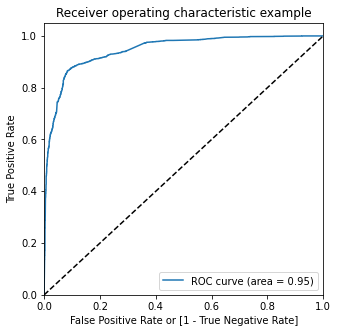

In [107]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.95 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [108]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.042075,0,1,0,0,0,0,0,0,0,0,0
1,0,0.053159,0,1,0,0,0,0,0,0,0,0,0
2,1,0.996858,1,1,1,1,1,1,1,1,1,1,1
3,0,0.005017,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025604,0,1,0,0,0,0,0,0,0,0,0


In [109]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# True_Positive = confusion[1,1]
# True_Negative = confusion[0,0]
# False_Positive = confusion[0,1]
# False_Negative = confusion[1,0]

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374114  1.000000  0.000000
0.1   0.1  0.760038  0.976010  0.630943
0.2   0.2  0.822075  0.929714  0.757736
0.3   0.3  0.879861  0.891414  0.872956
0.4   0.4  0.894820  0.868687  0.910440
0.5   0.5  0.894820  0.843434  0.925535
0.6   0.6  0.881436  0.788721  0.936855
0.7   0.7  0.860337  0.694024  0.959748
0.8   0.8  0.838923  0.601852  0.980629
0.9   0.9  0.807589  0.502104  0.990189


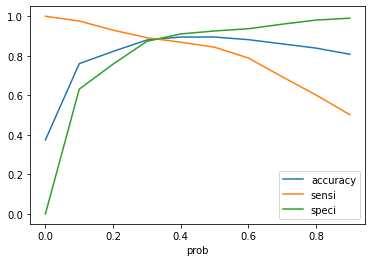

In [110]:
# Let's plot

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.31, you get the optimal values of the three metrics. So let's choose 0.31 as our cutoff now.

In [111]:
#Let's create another column with 0.32 probability cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.042075,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.053159,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.996858,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.005017,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.025604,0,1,0,0,0,0,0,0,0,0,0,0


In [112]:
# checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8869469374901591

In [113]:
# checking confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3530,  445],
       [ 273, 2103]])

| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 3530 | 445 |
| **Actual** Not Converted | 273       |  2103 |

In [114]:
# evaluating the other metrics as well

True_Positive = confusion2[1,1]
True_Negative = confusion2[0,0]
False_Positive = confusion2[0,1]
False_Negative = confusion2[1,0]

In [115]:
# Calculating sensitivity

print("Sensitivity :",True_Positive/(True_Positive+False_Negative))

Sensitivity : 0.88510101010101


In [116]:
# Calculating specificity

print("Specificity :",True_Negative/(True_Negative+False_Positive))

Specificity : 0.8880503144654088


#### 0.32 cut off is woring well

## Predictions on Test Set

In [117]:
numerical_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [118]:
# Scaling the test dataset

X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [119]:
# Selecting the columns which are present in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
3884,0.000000,0,0,0,0,1,1,1,0,0,0,1,0,0,0
6639,0.000000,0,0,0,0,1,1,1,0,0,0,0,0,0,0
429,0.096831,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4821,0.300176,1,0,0,0,0,0,1,0,0,0,0,1,0,0
735,0.144366,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [120]:
# Adding constant

X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
3884,1.0,0.000000,0,0,0,0,1,1,1,0,0,0,1,0,0,0
6639,1.0,0.000000,0,0,0,0,1,1,1,0,0,0,0,0,0,0
429,1.0,0.096831,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4821,1.0,0.300176,1,0,0,0,0,0,1,0,0,0,0,1,0,0
735,1.0,0.144366,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [121]:
# Droping the columns which are removed in the process of model building from X_train

X_test.drop(['Last Notable Activity_Had a Phone Conversation','What is your current occupation_Unemployed', 
             'Lead Source_Welingak Website','Tags_switched off'], 1, inplace = True)

In [122]:
# Making predictions on the test dataset

y_test_pred = res.predict(sm.add_constant(X_test))

In [123]:
y_test_pred[:5]

3884    0.042075
6639    0.000641
429     0.651982
4821    0.011279
735     0.816573
dtype: float64

In [124]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3884,0.042075
6639,0.000641
429,0.651982
4821,0.011279
735,0.816573


In [125]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3884,0
6639,0
429,0
4821,0
735,0


In [126]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.042075
1,0,0.000641
2,0,0.651982
3,0,0.011279
4,0,0.816573


In [129]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [130]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.042075
1,0,0.000641
2,0,0.651982
3,0,0.011279
4,0,0.816573


In [131]:
# Make predictions on the test set using 0.32 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.042075,0
1,0,0.000641,0
2,0,0.651982,1
3,0,0.011279,0
4,0,0.816573,1


In [132]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8780756518545721

In [133]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1448,  216],
       [ 116,  943]])

| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 1448 | 216 |
| **Actual** Not Converted | 116       |  943 |

In [134]:
# evaluating the other metrics 

True_Positive = confusion3[1,1]
True_Negative = confusion3[0,0]
False_Positive = confusion3[0,1]
False_Negative = confusion3[1,0]

In [135]:
# Calculating sensitivity

print("Sensitivity :",True_Positive/(True_Positive+False_Negative))

Sensitivity : 0.890462700661001


In [136]:
# Calculating specificity

print("Specificity :",True_Negative/(True_Negative+False_Positive))

Specificity : 0.8701923076923077


### Precision-Recall View

- Building the training model using the precision-recall view

In [137]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3679,  296],
       [ 372, 2004]])

| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 3679 | 296 |
| **Actual** Not Converted | 372       |  2004 |

In [138]:
# evaluating the other metrics
True_Positive = confusion[1,1]
True_Negative = confusion[0,0]
False_Positive = confusion[0,1]
False_Negative = confusion[1,0]

In [139]:
#Precision 
True_Positive/(True_Positive+False_Positive)

0.871304347826087

In [140]:
#Recall
True_Positive/(True_Positive+False_Negative)

0.8434343434343434

#### Precision and recall tradeoff

In [141]:
#importing required library for precision recall curve
from sklearn.metrics import precision_recall_curve

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

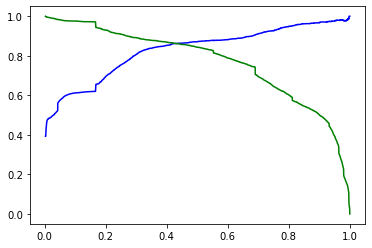

In [143]:
#ploting precision and recall curves
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [144]:
#predicting the values with cuttof 0.42
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.042075,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.053159,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.996858,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.005017,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.025604,0,1,0,0,0,0,0,0,0,0,0,0


In [145]:
# checking the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8973390017320108

In [146]:
# creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3643,  332],
       [ 320, 2056]])

| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 3643 | 332 |
| **Actual** Not Converted | 320       |  2056 |

In [147]:
# evaluating the other metrics
True_Positive = confusion2[1,1]
True_Negative = confusion2[0,0]
False_Positive = confusion2[0,1]
False_Negative = confusion2[1,0]

In [148]:
#Precision
True_Positive/(True_Positive+False_Positive)

0.8609715242881072

In [149]:
#Recall
True_Positive/(True_Positive+False_Negative)

0.8653198653198653

- **Both precision and recall are not having much difference**
- **Model is pretty good**

### Making Predictions on Test set

In [150]:
#making predictions on X_text dataset
y_test_pred = res.predict(sm.add_constant(X_test))

In [151]:
y_test_pred[:5]

3884    0.042075
6639    0.000641
429     0.651982
4821    0.011279
735     0.816573
dtype: float64

In [152]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3884,0.042075
6639,0.000641
429,0.651982
4821,0.011279
735,0.816573


In [153]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3884,0
6639,0
429,0
4821,0
735,0


In [154]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Merging y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.042075
1,0,0.000641
2,0,0.651982
3,0,0.011279
4,0,0.816573


In [156]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.042075
1,0,0.000641
2,0,0.651982
3,0,0.011279
4,0,0.816573


In [157]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.042075,0
1,0,0.000641,0
2,0,0.651982,1
3,0,0.011279,0
4,0,0.816573,1


In [158]:
# overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8894601542416453

In [159]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1502,  162],
       [ 139,  920]])

| Predicted/Actual | **Predicted** Converted    | Predicted Not Converted |
|--- |----------| ------|
| **Actual** Converted | 1502 | 162 |
| **Actual** Not Converted | 139       |  920 |

In [160]:
# evaluating the other metrics
True_Positive = confusion3[1,1]
True_Negative = confusion3[0,0]
False_Positive = confusion3[0,1]
False_Negative = confusion3[1,0]

In [161]:
#Precision 
True_Positive/(True_Positive+False_Positive)

0.8502772643253235

In [162]:
#Recall
True_Positive/(True_Positive+False_Negative)

0.8687440982058546

## Conclusion:

Based on the business requirement of providing scores to leads to maximise lead conversion, the sales team should focus on the following columns:
1. Total time spent on Website
2. Lead origin
    - Landing Page Submission (negatively correlated)
    - Lead Add Form 
3. Last Activity:
    - Email Bounced (Negatively correlated)
    - Olark Chat Conversation (Negatively correlated)
4.	Last Notable Activity_SMS Sent
5.	Tags:
    - Busy
    - Closed by Horizzon
    - Lost to EINS
    - Will revert after reading the email
6.	Specialization_Others (Negatively correlated)
